<a href="https://colab.research.google.com/github/soilapertet/GradeCalculator/blob/master/AIRS_Pytorch_Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is PyTorch?

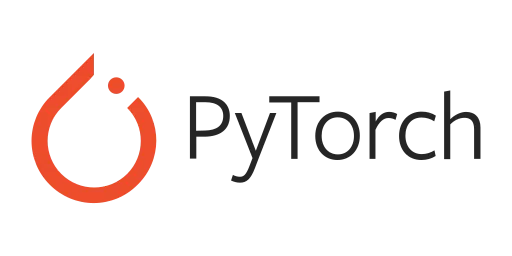

* Deep learning library
  * Written in C++ and Cuda
    * Cuda is the language for NVIDIA GPUs
    * Builds now exist with support for ROCm
      * For AMD GPUs
    * Limited support for MPS
      * MacOS devices
* APIs for Python, C++, Java
  * We will use Python
* Similar syntax to Numpy
  * Identical slicing rules
* Training
  * nn.Module
  * nn.Optim
* Many more things


# Today we will cover Tensors:
* Creating
* Data Types
* Behavior
* Basic operations
* Working with images
* Combining them
* CUDA

Extra topics:
* Images as Tensors
* Challenge Problems!

# Next Time:
* Neural Network basics

* We will get hands on with some tabular data to train a PyTorch Neural Network!


In [ ]:
import torch

torch.__version__

'2.6.0+cu124'

In [ ]:
torch.cuda.is_available() # Indicates if an Nvidia GPU is available.
                          # In colab, this will be False by default;
                          # however, you can get one by going to the runtime menu
                          # Don't waste your free GPU

True

## Where do we want to be after 2 sessions?

Here's a brief example of a training loop using PyTorch tensors. This demonstrates how tensors are used in a machine learning context, including defining a simple model, calculating a loss, and updating model parameters using gradients.

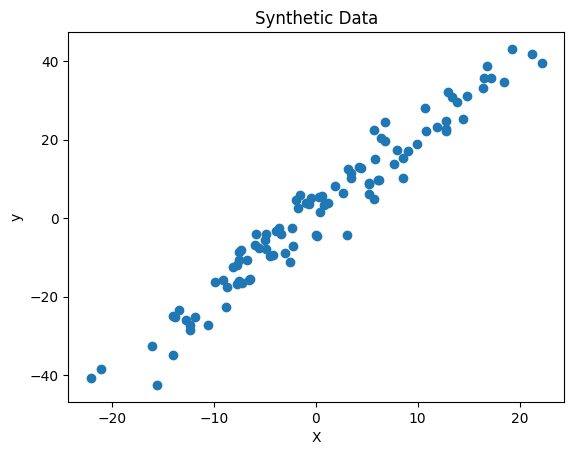

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. Generate some synthetic data
# We'll create a simple linear relationship with some noise: y = 2*x + 1 + noise
torch.manual_seed(42) # for reproducibility
X = torch.randn(100, 1) * 10 # 100 data points, 1 feature
y = 2 * X + 1 + torch.randn(100, 1) * 5 # Linear relationship + noise

# Display the data
plt.scatter(X.numpy(), y.numpy())
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()

In [ ]:
# 2. Define a simple linear model
# A linear model is just a single layer that performs a linear transformation: y = Wx + b
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) # input_features=1, output_features=1

    def forward(self, x):
        return self.linear(x)

# Create the model
model = LinearRegressionModel()

print("Initial model parameters:")
for name, param in model.named_parameters():
    print(f"Parameter name: {name}, Parameter value: {param.data}")

Initial model parameters:
Parameter name: linear.weight, Parameter value: tensor([[0.4801]])
Parameter name: linear.bias, Parameter value: tensor([0.8415])


In [ ]:
# 3. Define the loss function and optimizer
# Loss function: Measures how far off our model's predictions are from the actual values
criterion = nn.MSELoss() # Mean Squared Error is common for regression

# Optimizer: Updates the model's parameters based on the gradients of the loss
optimizer = optim.SGD(model.parameters(), lr=0.01) # Stochastic Gradient Descent

In [ ]:
# 4. Training loop
num_epochs = 100

# Lists to store loss values for plotting
loss_history = []

for epoch in range(num_epochs):
    # Forward pass: Compute predicted y by passing X to the model
    predicted_y = model(X)

    # Compute loss
    loss = criterion(predicted_y, y)

    # Backward pass and optimization
    optimizer.zero_grad() # Clear previous gradients
    loss.backward()       # Compute gradients of the loss with respect to model parameters
    optimizer.step()      # Update model parameters

    # Store loss for visualization
    loss_history.append(loss.item())

    # Print loss occasionally
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("\nTraining finished.")
print("Final model parameters:")
for name, param in model.named_parameters():
    print(f"Parameter name: {name}, Parameter value: {param.data}")

Epoch [10/100], Loss: 85.1281
Epoch [20/100], Loss: 36.1507
Epoch [30/100], Loss: 23.7423
Epoch [40/100], Loss: 20.5944
Epoch [50/100], Loss: 19.7930
Epoch [60/100], Loss: 19.5871
Epoch [70/100], Loss: 19.5329
Epoch [80/100], Loss: 19.5178
Epoch [90/100], Loss: 19.5131
Epoch [100/100], Loss: 19.5113

Training finished.
Final model parameters:
Parameter name: linear.weight, Parameter value: tensor([[2.0046]])
Parameter name: linear.bias, Parameter value: tensor([1.1346])


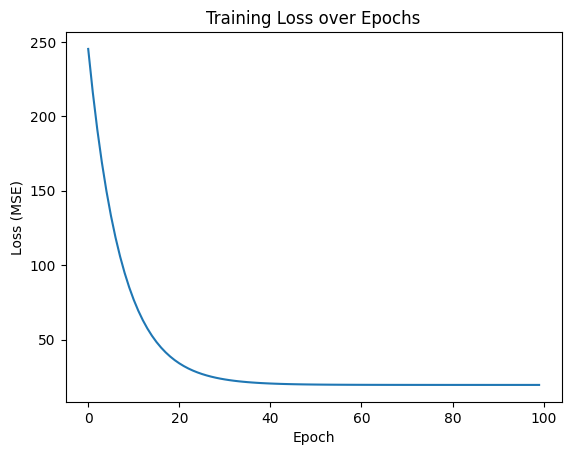

In [ ]:
# 5. Visualize the training loss
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.show()

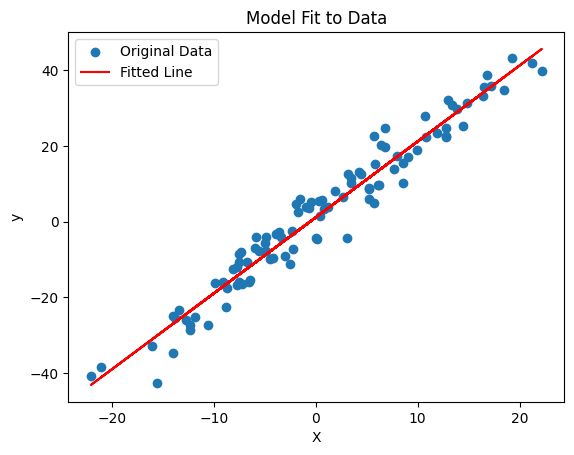

In [ ]:
# 6. Visualize the model's fit to the data
predicted_y_final = model(X).detach().numpy() # Use detach() to remove from computation graph

plt.scatter(X.numpy(), y.numpy(), label='Original Data')
plt.plot(X.numpy(), predicted_y_final, color='red', label='Fitted Line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Model Fit to Data")
plt.legend()
plt.show()

Tensors are the fundamental datatype in PyTorch. They are similar to NumPy arrays but with the added capability to be used on GPUs for accelerated computing and to efficiently calculate gradients (which is crucial for neural networks).

Tensors are stored as multidimensional arrays. By default, PyTorch uses row-major order, similar to C-style arrays.

In [ ]:
# Contructing a tensor via list cast

x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 9, 10]

x_tensor = torch.tensor(x)
y_tensor = torch.tensor(y)

print(type(x))
print(type(x_tensor))

print(type(y))
print(type(y_tensor))

print(x_tensor, x)
print(y_tensor, y)

# Numpy
You have done some session on Numpy - dont worry, everything you learned there still applies!

In [ ]:
import numpy as np
# Constructing a tensor from a numpy array

# Memory copy
print("Memory Copy\n")
x = np.array([1, 2, 3, 4, 5])
x_t = torch.tensor(x)

print("Before", x_t)
x[0] = 99
print("After", x_t)

# Same memory
print("\nSame memory\n")
x = np.array([5, 4, 3, 2, 1])
x_t = torch.from_numpy(x)
print(x_t)
x[0] = 99
print(x_t)
x_t[-1] = 100
print(x)

You can also convert back

In [ ]:
arr = x_t.numpy()
print(arr)

# Initializing
Tensors can be initialized in many ways!

---



In [ ]:
# Other tensor initializations
print(torch.ones(3, 4, 2))   # All ones # 3 Rows & 4 columns
torch.zeros(3, 4)  # All zeros
torch.rand(3, 4)   # Uniform Random [0, 1]
torch.randn(3, 4)  # Random from a normal distribution
torch.eye(3)       # "eye"dentity matrix nxn

Tensors have a shape, which describes the size of each dimension. For example, a 1D tensor (vector) with 3 elements has the shape `[3]`.

A 2D tensor (matrix) with 3 rows and 3 columns has the shape `[3, 3]`.

The shape of a tensor can be changed without creating a new copy of the underlying data. This is managed internally using attributes like size, offset, and stride.

**This implementation detail is often hidden, but understanding that reshaping views the same data in a different structure is an important feature for memory efficiency!**

In [ ]:
x = torch.randn(6,)
print(x)
# shapes = [(2, 3), (1, 1, 1, 1, 2, 3), (6,)]
# for shape in shapes:
#   print("=========================================================================")
#   x = x.view(*shape) # same as x.reshape
#   print("--------Shape--------")
#   print(x.shape, x.size())
#   print("--------Offset--------")
#   print(x.storage_offset())
#   print("--------Stride--------")
#   print(x.stride())
# print("=========================================================================")
print(x.storage())
x.storage()[0] = 99
print(x)
print("======y=====")
y = x[3:]
print(y)
print(y.storage(), y.storage_offset(), y.stride())
y.storage()[0] = 100
print(x)



As we saw, tensors can be viewed in different ways using operations like `reshape` or slicing. These operations do not change the underlying data in memory but rather how we interpret it. When we slice a tensor, we are not making a new copy of the data but simply defining a new view that starts and stops at specific points in the original data.

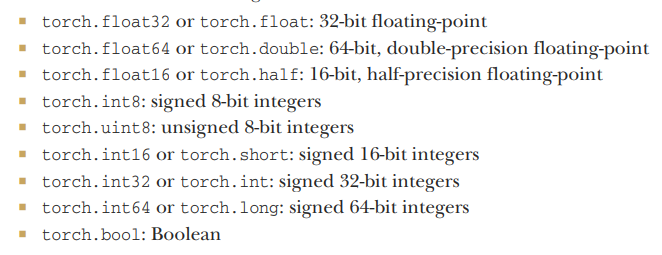

In [ ]:
import sys
# Tensor Datatypes
x = torch.ones((2, 2), dtype=torch.int8)
print(x, x.dtype)
x = x.to(int)     # the .to() method is useful for converting dtypes, as well as devices
print(x, x.dtype) # Notice that as "int" is int64 is long, which is not displayed in the print.
# .to() is not inplace
x.to(float)
print(x.dtype)
# Bytes per element
print(x.itemsize, x.to(torch.int8).itemsize, x.to(torch.int32).itemsize, x.to(bool).itemsize)

Let's explore some useful properties and operations you can perform on tensors.

In [ ]:
x = torch.randn(50, 50)
# # Some properties one would expect to be able to query
print(x.shape)
print(x.mean(), x.std())
print(x.det())
print(x.min(), x.max(), x.sum())

In [ ]:
# What elements exist in the array?
print(x.unique())

In [ ]:
# Math
print(x.std(), x.std()*2)
x = x*2 # elementwise
print(x.std())
print(x.mean(), x.mean()-2)
x -= 2
print(x.mean())

Broadcasting is a mechanism that allows PyTorch to perform operations on tensors of different shapes by automatically expanding the smaller tensor to match the shape of the larger tensor, without explicitly creating multiple copies of the data. This is a powerful feature for performing element-wise operations efficiently.

In [ ]:
x = torch.randn(50, 50)

y = torch.zeros_like(x)
x *= y     # broadcasting
print(x.mean(), x.unique())

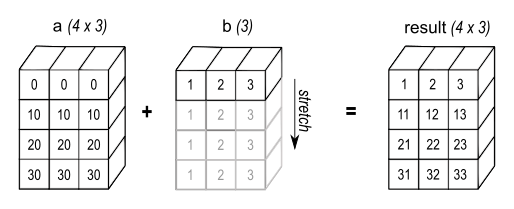

In [ ]:
# Broadcasting can be a bit more complex as well. Check out https://pytorch.org/docs/stable/notes/broadcasting.html
x = torch.randn(4, 3)
filter = torch.zeros(1, 3)
print(x, filter)
x = x*filter    # Because the filter matches the dimension in all but the first, it will apply to ALL rows
print(x)

In [ ]:
# Matrix multiplication - very important stuff
x = torch.randn(5, 3)
y = torch.eye(3) # [3, 3]

z = x @ y   # @ is matrix multiplication, very nice
print(z)    # y is the indentity matrix so obvisously, z is equal to x
z = torch.matmul(x, y)
# Equality stuff
print(z==x) # equal tells us if the entire array is eqivelant, == is element wise.

y = torch.tensor([0, 1, 2, 3])
x = torch.tensor([0, 1, 3, 2])

torch.sum(y==x)/y.shape[0]

One of the key advantages of PyTorch is its ability to perform computations on GPUs, which can significantly accelerate training of deep learning models.

In [ ]:
x = torch.ones(1, 2)
print(torch.cuda.is_available())
if torch.cuda.is_available():
    x = x.to('cuda')

print(x)
y = torch.ones(2, 3, device='cuda')
print(y.device)
print(y)
z = x@y
print(z)

In [ ]:
# Everything MUST be on the same device to operate on them.
# ERROR EXPECTED
# How can we fix this error?

x = torch.zeros(2, 2)
y = torch.eye(2, device='cuda')

z = x@y
print(z)

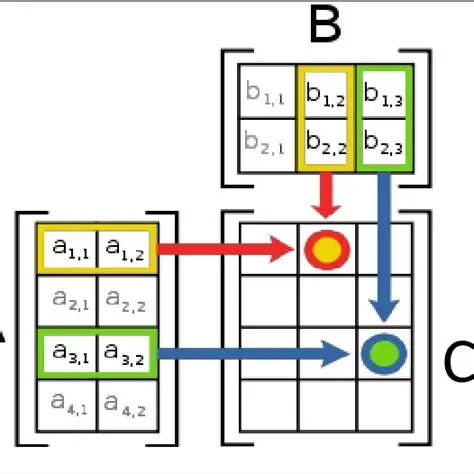

In [ ]:
n = 1000
x = torch.eye(n, device='cuda')
y = torch.eye(n, device='cuda')
print("Cuda")
%timeit x@y

x = torch.eye(n, device='cpu')
y = torch.eye(n, device='cpu')
print("CPU")
%timeit x@y

Now that you know how to operate on tensors, it is important to learn how to combine them. We can stack tensors along a new dimension or concatenate them along an existing dimension.

Stack:

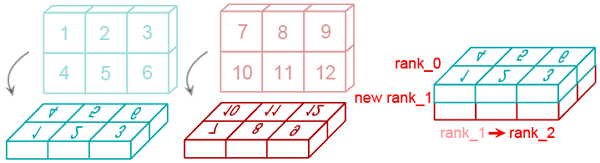

Concat:

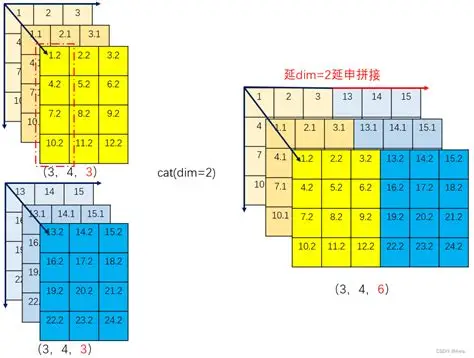

In [ ]:
a = torch.randn(3, 3, 3)
b = torch.randn(3, 3, 3)

c = torch.stack([a, b], dim=1)  # Make a new tensor where a and b are stacked along a new dim at index 0
print(c.shape)
c = torch.cat([a, b], dim=0)    # Make a new tensor where a and b are stacked along an existing dim.
print(c.shape)

It will be vital in deep leanring to know how to save and read with PyTorch. Good thing it is very very easy.

In [ ]:
x = torch.randn(4, 4)
torch.save(x.cuda(), 'x.pt')
y = torch.load('x.pt')
print(y==x)

On way tensors are useful is for representing images.

In this section, we will load an image, display it, and manipulate it.

In [ ]:
!wget https://www.stockvault.net/data/2007/03/01/98484/preview16.jpg

Now that we have the image, we can load it and represent it as a tensor. We'll use the `Pillow` library to open the image and `torch.ToTensor()` to convert it to a tensor.

In [ ]:
from PIL import Image
from torchvision import transforms

# Load the image
img_path = 'preview16.jpg'
img = Image.open(img_path)

# Convert the image to a PyTorch tensor
# ToTensor converts a PIL Image or numpy.ndarray to a PyTorch tensor.
# It also scales the pixel values to the range [0, 1].
transform = transforms.ToTensor()
img_tensor = transform(img)

print(f"Image shape: {img_tensor.shape}")
print(f"Image dtype: {img_tensor.dtype}")
print(f"Image min value: {img_tensor.min()}")
print(f"Image max value: {img_tensor.max()}")

The tensor representation of the image has the shape `[C, H, W]`, where `C` is the number of color channels (e.g., 3 for RGB), `H` is the height, and `W` is the width. The pixel values are typically in the range [0, 1] for float tensors.

We can display the image from the tensor using `transforms.ToPILImage()`.

In [ ]:
# Convert the tensor back to a PIL Image for display
to_pil = transforms.ToPILImage()
img_from_tensor = to_pil(img_tensor)

# Display the image
import matplotlib.pyplot as plt

plt.imshow(img_from_tensor)
plt.axis('off') # Hide axes
plt.show()

We can perform various manipulations on the image tensor using PyTorch operations. For example, let's try to change the color channels or apply some basic filters.

First, let's swap the red and blue channels of the RGB image.

In [ ]:
# Swap the red (channel 0) and blue (channel 2) channels
# The tensor shape is [C, H, W], so we access channels using the first dimension
img_swapped_channels = img_tensor[[2, 1, 0], :, :]

# Convert the manipulated tensor back to a PIL Image and display
img_swapped_pil = to_pil(img_swapped_channels)

plt.imshow(img_swapped_pil)
plt.axis('off')
plt.title("Red and Blue Channels Swapped")
plt.show()

We can also apply a simple transformation like converting the image to grayscale.

In [ ]:
# Convert the image to grayscale
# For a simple grayscale conversion, we can take the mean across the color channels
# Keepdim=True retains the channel dimension, resulting in a [1, H, W] tensor
img_gray = torch.mean(img_tensor, dim=0, keepdim=True)

# Convert the grayscale tensor back to a PIL Image and display
# Note: Matplotlib expects [H, W] for grayscale, so we squeeze the channel dimension
img_gray_pil = to_pil(img_gray.squeeze())

plt.imshow(img_gray_pil, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()

These are just a few basic examples. You can use various PyTorch operations to perform more complex image manipulations, such as cropping, resizing, rotations, and applying convolutional filters for tasks like edge detection or blurring.

# Challenge Problem

Can you flip the image upside down?

See if you can find any tensor functions that can help with this.

Remember, the image is [C, H, W] - so you need to flip the value in
dim 1.

In [ ]:
# prompt: can you write code that flips an image upside down?

# Flip the image upside down
# The tensor shape is [C, H, W], so we flip along the height dimension (dimension 1)
img_flipped = None
# =============== your code here =================



# ============== your code ends here =============
# Convert the flipped tensor back to a PIL Image and display
img_flipped_pil = to_pil(img_flipped)

plt.imshow(img_flipped_pil)
plt.axis('off')
plt.title("Image Flipped Upside Down")
plt.show()

### Challenge Problem: Tensor Manipulation

Here's a challenge to test your understanding of tensor operations.

**Problem:**

Given a 2D tensor `x`, write code to:

1.  Normalize each row of the tensor to have a mean of 0 and a standard deviation of 1.
2.  Replace all negative values in the normalized tensor with 0.

**Hint:** Remember tensor broadcasting and operations like `mean()`, `std()`, and element-wise comparisons.

Remember, to normalize a distribution:
1. Subtract mean, divide std

In [ ]:
# A cool slicing ability (hint hint):

x = torch.tensor([1, 2, 3])
print(x)
print(x[x != 3]) # read as "x where x is not 3"
x[x==3] = 4 # read as "set to 4 in x where x equals three"
print(x)

In [ ]:
# Generate a sample tensor
x = torch.randn(5, 10)
print("Original tensor:")
print(x)

normalized_x = None
# ===================== Your code here =========================:
# 1. Normalize each row of x


# ==================== Your code ends ==========================
print("\nNormalized tensor:")
print("Means: ", normalized_x.mean(dim=0))
print("STDs: ", normalized_x.std(dim=0))

non_zero_x = None
# =================== Your code here ===========================
# 2. Replace negative values in normalized_x with 0



# =================== Your code here ==========================
print("\nTensor with negative values replaced:")
print(non_zero_x)


### Applying a Convolutional Filter

Another practical use of tensors in image processing is applying convolutional filters. These filters are used to perform operations like blurring, sharpening, or edge detection. We can represent a filter as a small tensor and apply it to the image tensor using tensor operations.

Let's apply a simple edge detection filter to the grayscale image we created
earlier.

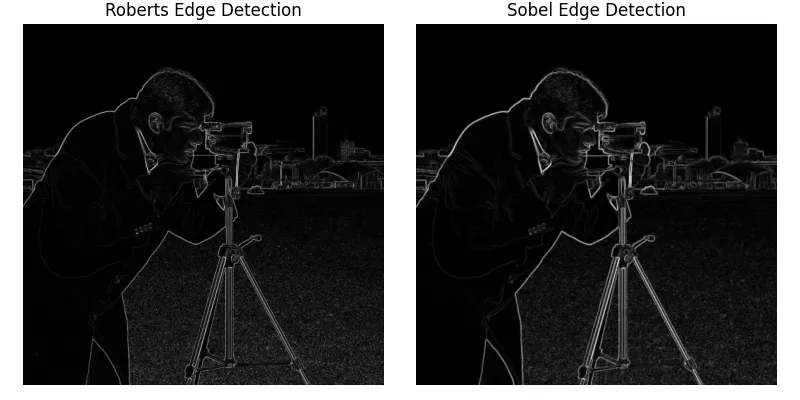

In [ ]:
import torch.nn.functional as F

# Define a simple edge detection filter (Sobel-like kernel in one direction)
# This is a 2D filter, but for use with the image tensor [C, H, W], we need
# to reshape it to [out_channels, in_channels/groups, kH, kW].
# Since we are applying it to a single channel grayscale image, in_channels=1.
# We'll have one output channel as well.
edge_filter = torch.tensor([[-1., -1., -1.],
                            [-1.,  8., -1.],
                            [-1., -1., -1.]])

# Reshape the filter for convolution: [out_channels, in_channels, kH, kW]
# View does not modify the tensor in memory, but just changes how it looks!
edge_filter = edge_filter.view(1, 1, 3, 3)

# The grayscale image tensor is [1, H, W]. For convolution, PyTorch expects [N, C, H, W],
# where N is the batch size. We can add a batch dimension of 1.
img_gray_batch = img_gray.unsqueeze(0)
# the new shape is [1, 1, H, W]

# Apply the convolution
# F.conv2d(input, weight, bias=None, stride=1, padding=0, dilation=1, groups=1)
# input: [N, C_in, H_in, W_in]
# weight: [C_out, C_in / groups, kH, kW]
img_edges = F.conv2d(img_gray_batch, edge_filter, padding=1) # Add padding to keep the same size

# Remove the batch dimension and convert back to PIL Image
img_edges_pil = to_pil(img_edges.squeeze(0))

# Display the resulting image
plt.imshow(img_edges_pil, cmap='gray')
plt.axis('off')
plt.title("Image with Edge Detection Filter Applied")
plt.show()

As you can see, applying the convolution filter highlights the edges in the image. This is a basic example, but it demonstrates how tensors and convolutional operations are used in image processing tasks, which is a core concept in deep learning for computer vision.